In [1]:
!pip install kaggle

In [2]:
## Configuring the path of the kaggle library
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

**Importing Dog vs Cat Dataset**

In [3]:
## Kaggle API
!kaggle competitions download -c dogs-vs-cats

100% 811M/812M [00:21<00:00, 45.6MB/s]
100% 812M/812M [00:21<00:00, 40.4MB/s]


In [4]:
## Prints all the files in your directory
!ls


dogs-vs-cats.zip  kaggle.json  sample_data


In [5]:
## Extracting he compressed file
from zipfile import ZipFile

data = '/content/dogs-vs-cats.zip'

with ZipFile(data,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [6]:
# extracting the compressed dataset
from zipfile import ZipFile

data = '/content/train.zip'

with ZipFile(data, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
import os

## Counting the number of files in trained folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [8]:
## Printing the names of the images

file_names = os.listdir('/content/train')
print(file_names)

['dog.5878.jpg', 'cat.1183.jpg', 'cat.2217.jpg', 'dog.3535.jpg', 'cat.7923.jpg', 'cat.8030.jpg', 'cat.6182.jpg', 'dog.2072.jpg', 'cat.4809.jpg', 'cat.2154.jpg', 'cat.8123.jpg', 'cat.5939.jpg', 'dog.8916.jpg', 'dog.574.jpg', 'cat.8020.jpg', 'cat.9047.jpg', 'dog.12439.jpg', 'cat.9896.jpg', 'dog.10188.jpg', 'cat.88.jpg', 'cat.3482.jpg', 'dog.163.jpg', 'dog.9864.jpg', 'cat.301.jpg', 'cat.8591.jpg', 'dog.5787.jpg', 'dog.1741.jpg', 'dog.5629.jpg', 'cat.2479.jpg', 'dog.8304.jpg', 'dog.7345.jpg', 'cat.2782.jpg', 'dog.149.jpg', 'cat.6602.jpg', 'dog.174.jpg', 'cat.626.jpg', 'dog.3903.jpg', 'cat.10077.jpg', 'dog.1606.jpg', 'dog.8329.jpg', 'dog.1972.jpg', 'dog.4134.jpg', 'cat.9737.jpg', 'dog.5935.jpg', 'dog.2630.jpg', 'cat.10827.jpg', 'cat.10158.jpg', 'cat.8907.jpg', 'cat.3436.jpg', 'dog.11550.jpg', 'cat.6348.jpg', 'cat.4711.jpg', 'dog.3411.jpg', 'cat.2156.jpg', 'dog.11038.jpg', 'cat.10355.jpg', 'cat.2041.jpg', 'dog.9756.jpg', 'dog.8590.jpg', 'cat.7583.jpg', 'cat.9197.jpg', 'dog.12333.jpg', 'dog.8

## Importing Neccessary Libraries

In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

## Displaying Images

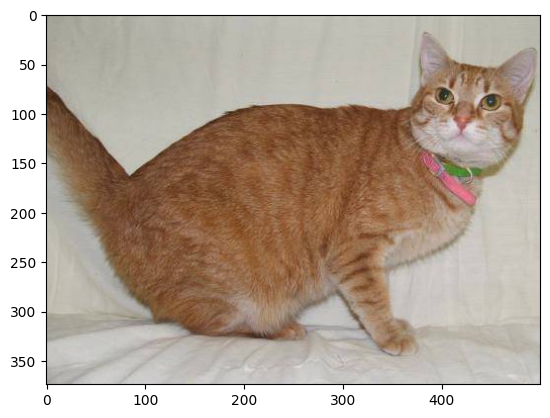

In [10]:
## Display Cat image
img = mpimg.imread('/content/train/cat.10611.jpg')
imgplot = plt.imshow(img)
plt.show()

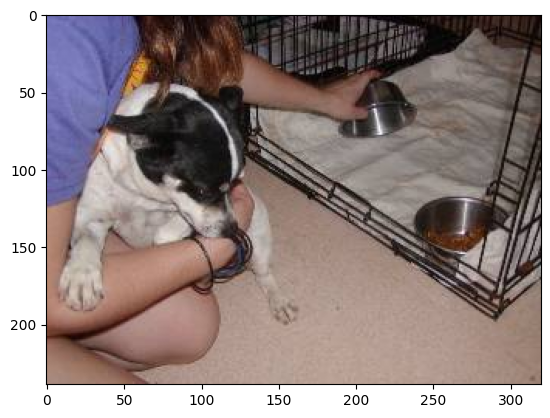

In [12]:
## Display Dog image
img = mpimg.imread('/content/train/dog.3535.jpg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
file_names = os.listdir('/content/train/')

for i in range(5):

    name = file_names[i]
    print(name[0:3])

dog
cat
cat
dog
cat


In [14]:
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count += 1

print('No. of dog images: ', dog_count)
print('No. of cat images: ', cat_count)

No. of dog images:  12500
No. of cat images:  12500


### Resizing All The Images

In [15]:
## Creating a directory for resized images
os.mkdir('/content/image resized')

In [16]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

## Iterating through only 2000 images

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename
  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + filename
  img.save(newImgPath)

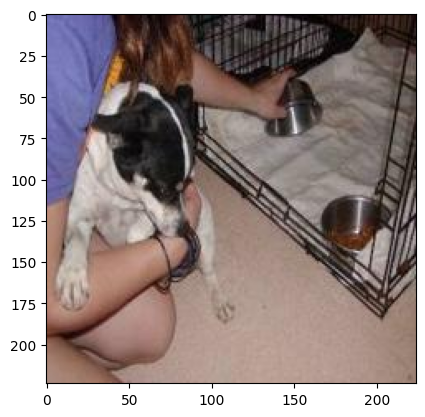

In [17]:
## Display resized dog image
img = mpimg.imread('/content/image resized/dog.3535.jpg')
imgplt = plt.imshow(img)
plt.show()

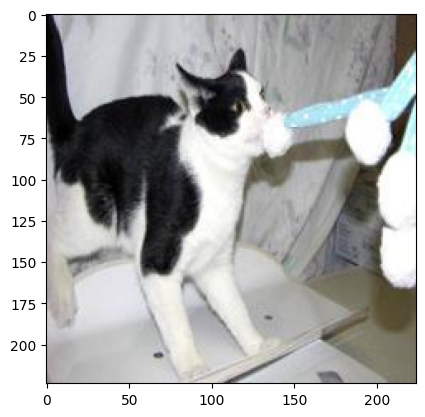

In [19]:
# display resized cat image
img = mpimg.imread('/content/image resized/cat.5939.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating Labels for resized images of Dogs and Cats**

Cat --> 0

Dog --> 1

In [20]:
## Creating for loop for assigning labels

filenames = os.listdir('/content/image resized/')

labels = []

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
    labels.append(0)

In [21]:
print(filenames[0:5])
print(len(filenames))

['dog.5878.jpg', 'cat.1183.jpg', 'cat.2217.jpg', 'dog.3535.jpg', 'cat.7923.jpg']
2000


In [22]:
print(labels[0:5])
print(len(labels))

[1, 0, 0, 1, 0]
2000


In [23]:
## Counting the images of dogs and cats out of 2000 images

values, counts = np.unique(labels, return_counts=True)

print(values)
print(counts)

[0 1]
[ 990 1010]


##**Converting all the resized images to numpy array**

In [24]:
import cv2 # Open CV library
import glob

In [26]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_images)

In [28]:
 X = dog_cat_images
 y = np.asarray(labels)

**Train Test Split**

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 --> training images

400 --> test images

In [32]:
## Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255


In [ ]:
print(X_train_scaled)

**Training The Neural Network**

In [34]:
import tensorflow as tf
import tensorflow_hub as hub

In [37]:
# Transfer learning
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3),trainable=False)

In [38]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [39]:
model.compile(

     optimizer = 'adam',
     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
     metrics = ['acc']

)

In [40]:
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 74s 1s/step - loss: 0.3000 - acc: 0.8769
Epoch 2/5
50/50 [==============================] - 66s 1s/step - loss: 0.0972 - acc: 0.9669
Epoch 3/5
50/50 [==============================] - 74s 1s/step - loss: 0.0750 - acc: 0.9756
Epoch 4/5
50/50 [==============================] - 74s 1s/step - loss: 0.0608 - acc: 0.9831
Epoch 5/5
50/50 [==============================] - 67s 1s/step - loss: 0.0543 - acc: 0.9800


In [41]:
score, acc = model.evaluate(X_test_scaled, y_test)

print('Test Loss = ',score)
print('Test Accuracy =', acc)

13/13 [==============================] - 18s 1s/step - loss: 0.0588 - acc: 0.9800
Test Loss =  0.05881417915225029
Test Accuracy = 0.9800000190734863


#**Predictive System**

Path of the image to be predicted: /content/train/cat.1.jpg


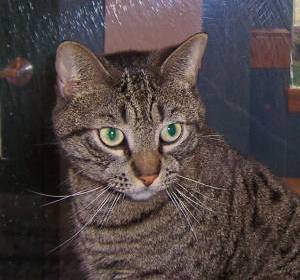

1/1 [==============================] - 1s 641ms/step
[[ 3.0454388 -2.1395478]]
0
The image represents a Cat


In [50]:
from google.colab.patches import cv2_imshow
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')